# Descriptive Analytics

In [32]:
# requirements
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in the Data

In [33]:
df = pd.read_csv('data/listings.csv')

C:\Users\carol\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
df = pd.DataFrame(df)
df.head()

,ID,Name,Host_ID,Host_Name,Neighborhood_Group,Neighbourhood,Latitude,Longitude,Room_Type,Price,...,Last_Review,Reviews_per_Month,Calculated_Host_Listings_Count,Availability_365,Number_of_Reviews_LTM,Llicense,City,State,MedianIncome,MedianAge
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,120,...,11/30/2019,0.71,2,344,0,NaN,Asheville,NC,49809,39.0
1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,...,12/5/2021,2.75,7,244,68,NaN,Asheville,NC,49809,39.0
2,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,...,1/1/2020,0.54,7,0,0,NaN,Asheville,NC,49809,39.0
3,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Shared room,33,...,11/14/2021,2.36,7,262,15,NaN,Asheville,NC,49809,39.0
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,...,10/19/2015,0.46,1,0,0,NaN,Asheville,NC,49809,39.0


In [35]:
df = df[df["Number_of_Reviews"] >= 1]
df.iloc[:,1:20].head()

,Name,Host_ID,Host_Name,Neighborhood_Group,Neighbourhood,Latitude,Longitude,Room_Type,Price,Minimum_Nights,Number_of_Reviews,Last_Review,Reviews_per_Month,Calculated_Host_Listings_Count,Availability_365,Number_of_Reviews_LTM,Llicense,City,State
0,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,120,30,89,11/30/2019,0.71,2,344,0,NaN,Asheville,NC
1,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,347,12/5/2021,2.75,7,244,68,NaN,Asheville,NC
2,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,1,67,1/1/2020,0.54,7,0,0,NaN,Asheville,NC
3,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Shared room,33,1,296,11/14/2021,2.36,7,262,15,NaN,Asheville,NC
4,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,10/19/2015,0.46,1,0,0,NaN,Asheville,NC


In [36]:
# Dropping unwanted columns

df_analysis = df.drop(['ID', 'Name', 'Host_ID', 'Host_Name', 'Neighborhood_Group', 'Neighbourhood', 'Last_Review', 'Llicense'], axis=1)

In [37]:
df_analysis.head()

,Latitude,Longitude,Room_Type,Price,Minimum_Nights,Number_of_Reviews,Reviews_per_Month,Calculated_Host_Listings_Count,Availability_365,Number_of_Reviews_LTM,City,State,MedianIncome,MedianAge
0,35.60670,-82.55563,Entire home/apt,120,30,89,0.71,2,344,0,Asheville,NC,49809,39.0
1,35.57864,-82.59578,Entire home/apt,90,1,347,2.75,7,244,68,Asheville,NC,49809,39.0
2,35.57864,-82.59578,Private room,66,1,67,0.54,7,0,0,Asheville,NC,49809,39.0
3,35.57864,-82.59578,Shared room,33,1,296,2.36,7,262,15,Asheville,NC,49809,39.0
4,35.61442,-82.54127,Private room,125,30,58,0.46,1,0,0,Asheville,NC,49809,39.0


In [38]:
le = LabelEncoder()

# Room_Type
room_type = le.fit_transform(df_analysis['Room_Type'])
le.fit(df_analysis['Room_Type'])
df_room_type_key = pd.DataFrame(le.classes_)

# City
city = le.fit_transform(df_analysis['City'])
le.fit(df_analysis['City'])
df_city_key = pd.DataFrame(le.classes_)

# State
state = le.fit_transform(df_analysis['State'])
le.fit(df_analysis['State'])
df_state_key = pd.DataFrame(le.classes_)

In [39]:
from IPython.display import display, HTML
from IPython.display import display_html

df1_styler = df_room_type_key.style.set_table_attributes("style='display:inline-block; vertical-align: top'").set_caption('Room Type')
df2_styler = df_city_key.style.set_table_attributes("style='display:inline-block; vertical-align: top'").set_caption('City')
df3_styler = df_state_key.style.set_table_attributes("style='display:inline-block; vertical-align: top'").set_caption('State')
 
display_html(df1_styler._repr_html_()+ df2_styler._repr_html_() + df3_styler._repr_html_(), raw=True)

,0
0,Entire home/apt
1,Hotel room
2,Private room
3,Shared room
,0
0,Asheville
1,Austin
2,Boston
3,Broward County
4,Cambridge


In [40]:
df_analysis.drop(['Room_Type', 'City', 'State'], axis=1)
df_analysis['Room_Type'] = room_type
df_analysis['City'] = city
df_analysis['State'] = state

### Exploratory Analysis

Text(0.5, 1.0, 'Correlation between Potential Features')

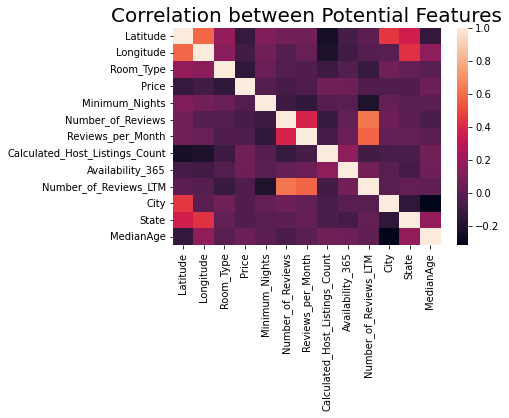

In [41]:
# Correlation Matrix
heatmap = sns.heatmap(df_analysis.corr(), cmap='rocket')
heatmap.set_title("Correlation between Potential Features", fontsize = 20)

### Feature Modeling Data Preparation

In [42]:
# Get Room Dummies
rooms = pd.get_dummies(df['Room_Type'], prefix='Room')
df2 = pd.concat([df, rooms], axis=0).drop('Room_Type', axis=1)

# Get City Dummies
city = pd.get_dummies(df['City'], prefix='City')
df2 = pd.concat([df, city], axis=0).drop('City', axis=1)

# Get State Dummies
state = pd.get_dummies(df['State'], prefix='State')
df2 = pd.concat([df, state], axis=0).drop('State', axis=1)

### Histograms of Features

In [43]:
df_analysis.describe()

,Latitude,Longitude,Room_Type,Price,Minimum_Nights,Number_of_Reviews,Reviews_per_Month,Calculated_Host_Listings_Count,Availability_365,Number_of_Reviews_LTM,City,State,MedianAge
count,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,171153.000000,170555.000000
mean,34.946706,-104.513725,0.522568,220.885266,11.248672,48.065444,1.751875,16.683178,168.682103,13.039362,12.263151,6.560341,38.037777
std,6.923743,26.450064,0.893432,451.250354,23.858829,77.787830,3.052972,46.142915,130.291954,20.519525,6.902108,5.973930,1.674998
min,18.920250,-159.714620,0.000000,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000
25%,30.373270,-118.533200,0.000000,87.000000,2.000000,4.000000,0.290000,1.000000,44.000000,1.000000,8.000000,0.000000,37.000000
50%,36.113470,-104.990450,0.000000,140.000000,3.000000,17.000000,1.000000,2.000000,160.000000,4.000000,11.000000,4.000000,38.000000
75%,40.693910,-80.097400,2.000000,240.000000,29.000000,57.000000,2.360000,8.000000,300.000000,18.000000,15.000000,12.000000,39.000000
max,47.734034,-70.997810,3.000000,25000.000000,1250.000000,1623.000000,362.000000,439.000000,365.000000,1077.000000,27.000000,18.000000,42.000000


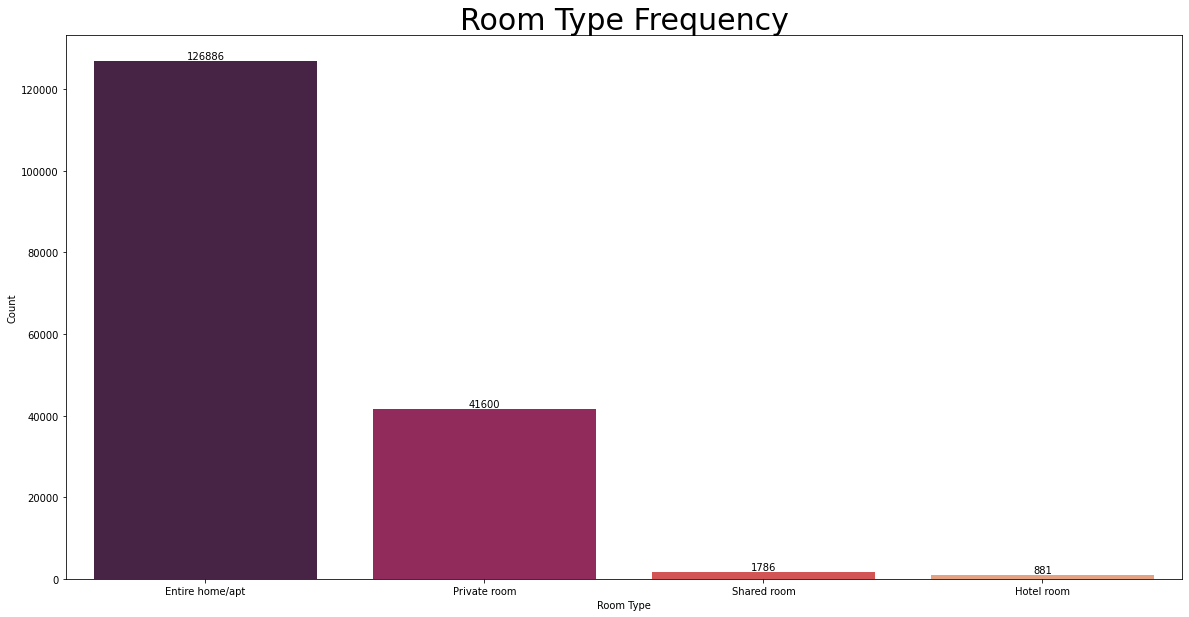

In [44]:
plt.figure(figsize=(20, 10))
Room_Type_Plot = sns.countplot(data = df, x = "Room_Type", palette="rocket")
Room_Type_Plot.set(xlabel = "Room Type", ylabel="Count", title = "Room Type Frequency", xlim=(-.5,3.5), xticks=(0,1,2,3))
Room_Type_Plot.set_title("Room Type Frequency", fontsize = 30)
# Cannot figure out how to change the width for the life of me

for i in Room_Type_Plot.containers:
    Room_Type_Plot.bar_label(i,)

[Text(0.5, 1.0, 'Histogram of One-Night Price')]

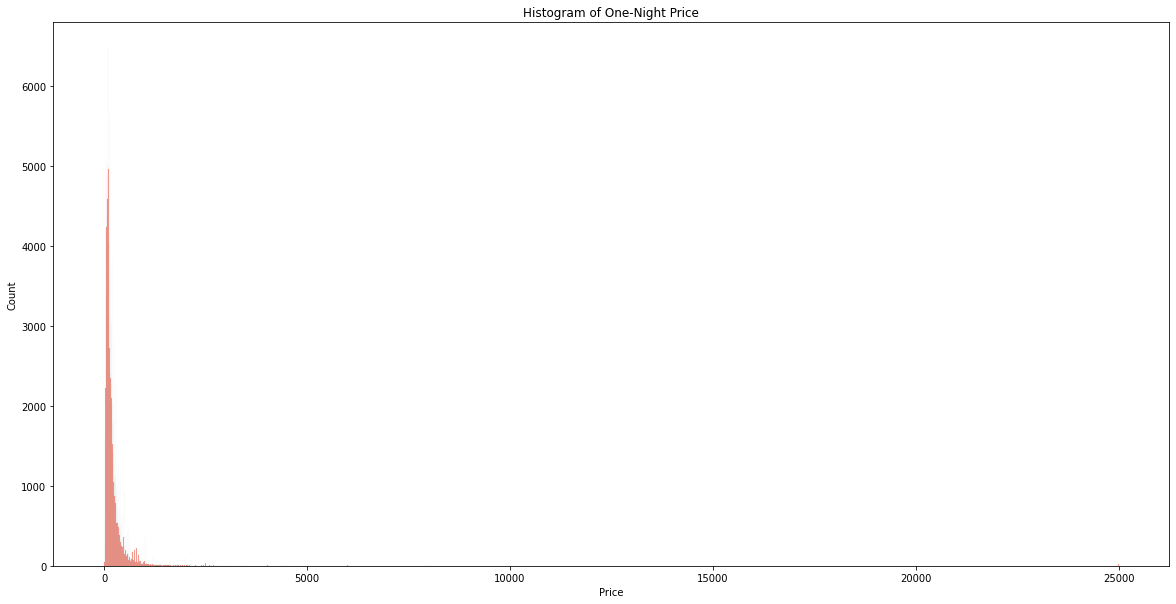

In [45]:
plt.figure(figsize=(20, 10))
Price_Plot = sns.histplot(data = df_analysis, x = "Price", color="salmon")
Price_Plot.set(title = "Histogram of One-Night Price")

# Obviously some outliers here

Text(0.5, 1.0, 'Histogram of One-Night Price')

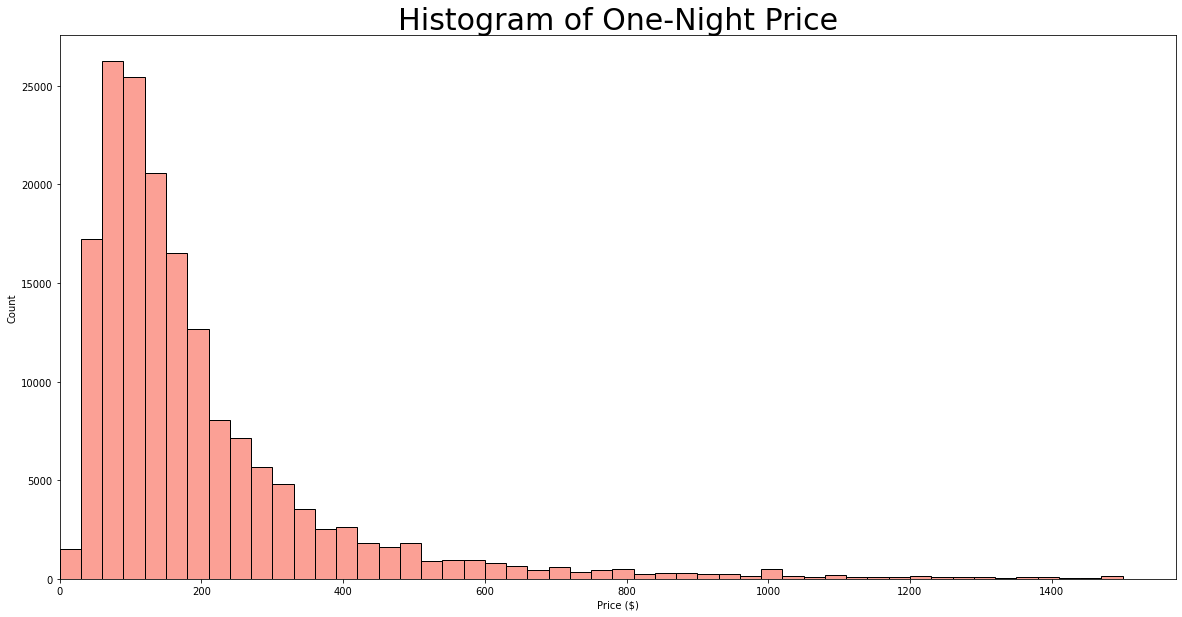

In [46]:
plt.figure(figsize=(20, 10))
Price_Plot = sns.histplot(data = df_analysis, x = "Price", bins = 50, binrange = (0, 1500), color="salmon")
Price_Plot.set_xlabel("Price ($)")
Price_Plot.set(xlim=0)
Price_Plot.set_title("Histogram of One-Night Price", fontsize = 30)
# Price_Plot.set(title = "Histogram of One-Night Price", xlim=(0,1500))

# Narrowing down the axis limits for visualization 

Text(0.5, 1.0, 'Average Price by Room Type')

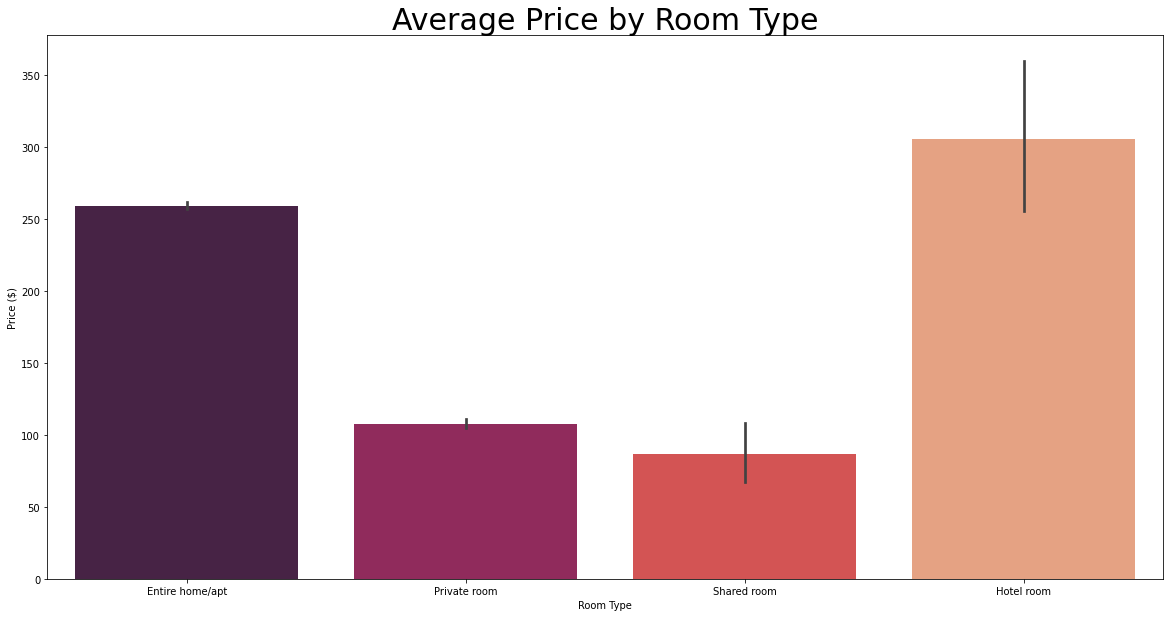

In [47]:
plt.figure(figsize=(20, 10))
Room_Type_Price_Plot = sns.barplot(data=df, x="Room_Type", y="Price", palette="rocket")
Room_Type_Price_Plot.set(xlabel = "Room Type", ylabel="Price ($)", title = "Price by Room Type")
Room_Type_Price_Plot.set_title("Average Price by Room Type", fontsize = 30)

In [48]:
column = df["Price"]
max_value = column.idxmax()
print(max_value)

df.iloc[47965, :]

59154


ID                                                          18569576
Name                              Westin Kaanapali North Ocean Front
Host_ID                                                     41968839
Host_Name                                                       Eric
Neighborhood_Group                                              Maui
Neighbourhood                                                Lahaina
Latitude                                                    20.93833
Longitude                                                 -156.69174
Room_Type                                               Private room
Price                                                            875
Minimum_Nights                                                     7
Number_of_Reviews                                                  2
Last_Review                                               11/27/2021
Reviews_per_Month                                               0.04
Calculated_Host_Listings_Count    

In [49]:
order2 = df.groupby(["City"])["Price"].count().sort_values(ascending=False).index

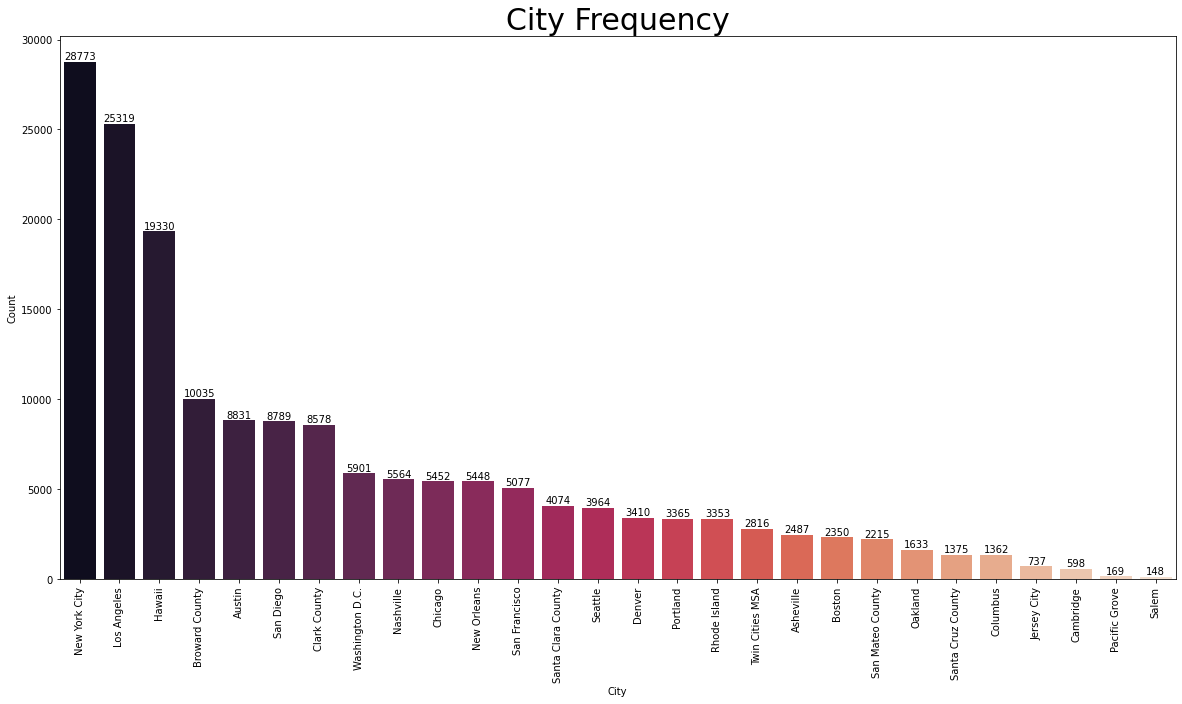

In [50]:
plt.figure(figsize=(20, 10))
City_Plot = sns.countplot(data = df, x = "City", palette="rocket", order=order2)
City_Plot.set(xlabel = "City", ylabel="Count", title = "City Frequency", xlim=(-.5,27.5), xticks=(range(28)))
City_Plot.set_title("City Frequency", fontsize = 30)
City_Plot.set_xticklabels(City_Plot.get_xticklabels(), rotation=90)
for i in City_Plot.containers:
    City_Plot.bar_label(i,)

In [51]:
order = df.groupby(["City"])["Price"].mean().sort_values(ascending=False).index
print(order)

Index(['Hawaii', 'Broward County', 'Santa Cruz County', 'Pacific Grove',
       'Rhode Island', 'San Diego', 'Austin', 'Clark County', 'Nashville',
       'Los Angeles', 'San Mateo County', 'San Francisco', 'New Orleans',
       'Twin Cities MSA', 'Santa Clara County', 'Asheville', 'Cambridge',
       'Denver', 'Boston', 'New York City', 'Chicago', 'Seattle',
       'Washington D.C.', 'Jersey City', 'Oakland', 'Salem', 'Portland',
       'Columbus'],
      dtype='object', name='City')


In [52]:
df_hawaii = df[df["City"] == "Hawaii"]
df_nyc = df[df["City"] == "New York City"]
df_la = df[df["City"] == "Los Angeles"]

print("Hawaii: ", df_hawaii.mean())
print("LA: ", df_la.mean())
print("NYC: ", df_nyc.mean())

C:\Users\carol\AppData\Local\Temp/ipykernel_16740/2523844311.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Hawaii: ", df_hawaii.mean())


Hawaii:  ID                                3.076688e+07
Host_ID                           1.098132e+08
Latitude                          2.089017e+01
Longitude                        -1.571453e+02
Price                             3.454831e+02
Minimum_Nights                    6.292447e+00
Number_of_Reviews                 3.679007e+01
Reviews_per_Month                 1.142661e+00
Calculated_Host_Listings_Count    5.416239e+01
Availability_365                  1.906599e+02
Number_of_Reviews_LTM             1.218282e+01
MedianAge                         3.900000e+01
dtype: float64


C:\Users\carol\AppData\Local\Temp/ipykernel_16740/2523844311.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("LA: ", df_la.mean())


LA:  ID                                3.028400e+07
Host_ID                           1.128142e+08
Latitude                          3.404752e+01
Longitude                        -1.183129e+02
Price                             2.141036e+02
Minimum_Nights                    1.780521e+01
Number_of_Reviews                 4.518761e+01
Reviews_per_Month                 1.779979e+00
Calculated_Host_Listings_Count    1.108085e+01
Availability_365                  1.716880e+02
Number_of_Reviews_LTM             1.009116e+01
MedianIncome                               inf
MedianAge                         3.700000e+01
dtype: float64
NYC:  ID                                2.731299e+07
Host_ID                           1.057316e+08
Latitude                          4.072783e+01
Longitude                        -7.394751e+01
Price                             1.617550e+02
Minimum_Nights                    1.892361e+01
Number_of_Reviews                 3.100003e+01
Reviews_per_Month                 

C:\Users\carol\AppData\Local\Temp/ipykernel_16740/2523844311.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("NYC: ", df_nyc.mean())


In [53]:
df_cbus = df[df["City"] == "Columbus"]

print("Cbus: ", df_cbus.mean())

Cbus:  ID                                3.959704e+07
Host_ID                           1.529999e+08
Neighborhood_Group                         NaN
Latitude                          3.998409e+01
Longitude                        -8.299257e+01
Price                             1.221079e+02
Minimum_Nights                    4.345081e+00
Number_of_Reviews                 6.444053e+01
Reviews_per_Month                 2.976953e+00
Calculated_Host_Listings_Count    1.580470e+01
Availability_365                  1.947137e+02
Number_of_Reviews_LTM             2.601836e+01
MedianIncome                               inf
MedianAge                         3.900000e+01
dtype: float64


C:\Users\carol\AppData\Local\Temp/ipykernel_16740/2007217093.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Cbus: ", df_cbus.mean())


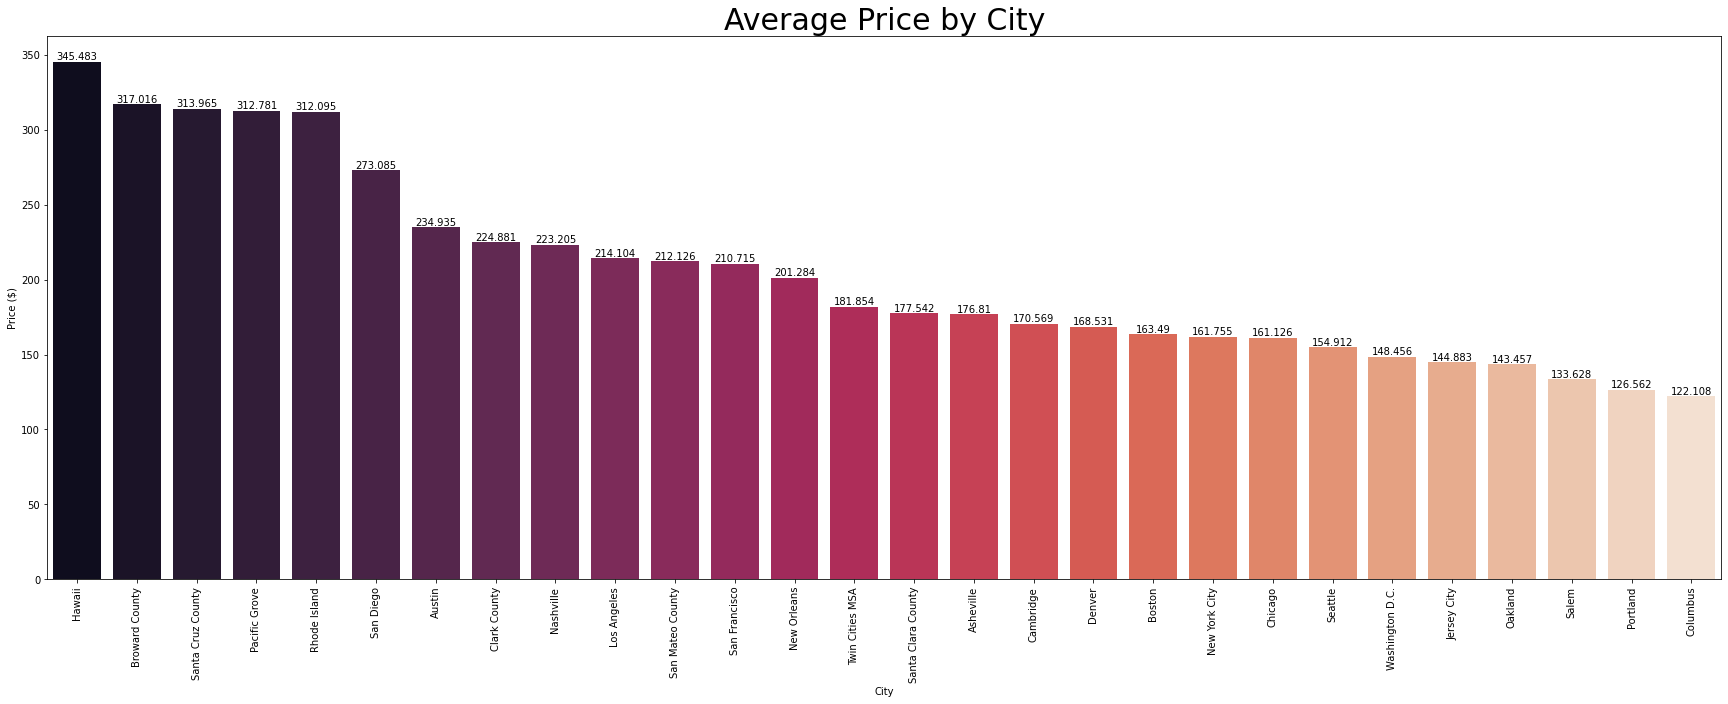

In [54]:
plt.figure(figsize=(30, 10))
City_Price_Plot = sns.barplot(data=df, x="City", y="Price", ci=None, order=order, palette="rocket")
City_Price_Plot.set(xlabel = "City", ylabel = "Price ($)", title = "Average Price by City")
City_Price_Plot.set_title("Average Price by City", fontsize = 30)
City_Price_Plot.set_xticklabels(order, rotation=90)
for i in City_Price_Plot.containers:
    City_Price_Plot.bar_label(i,)

In [55]:
order3 = df.groupby(["State"])["Price"].count().sort_values(ascending=False).index

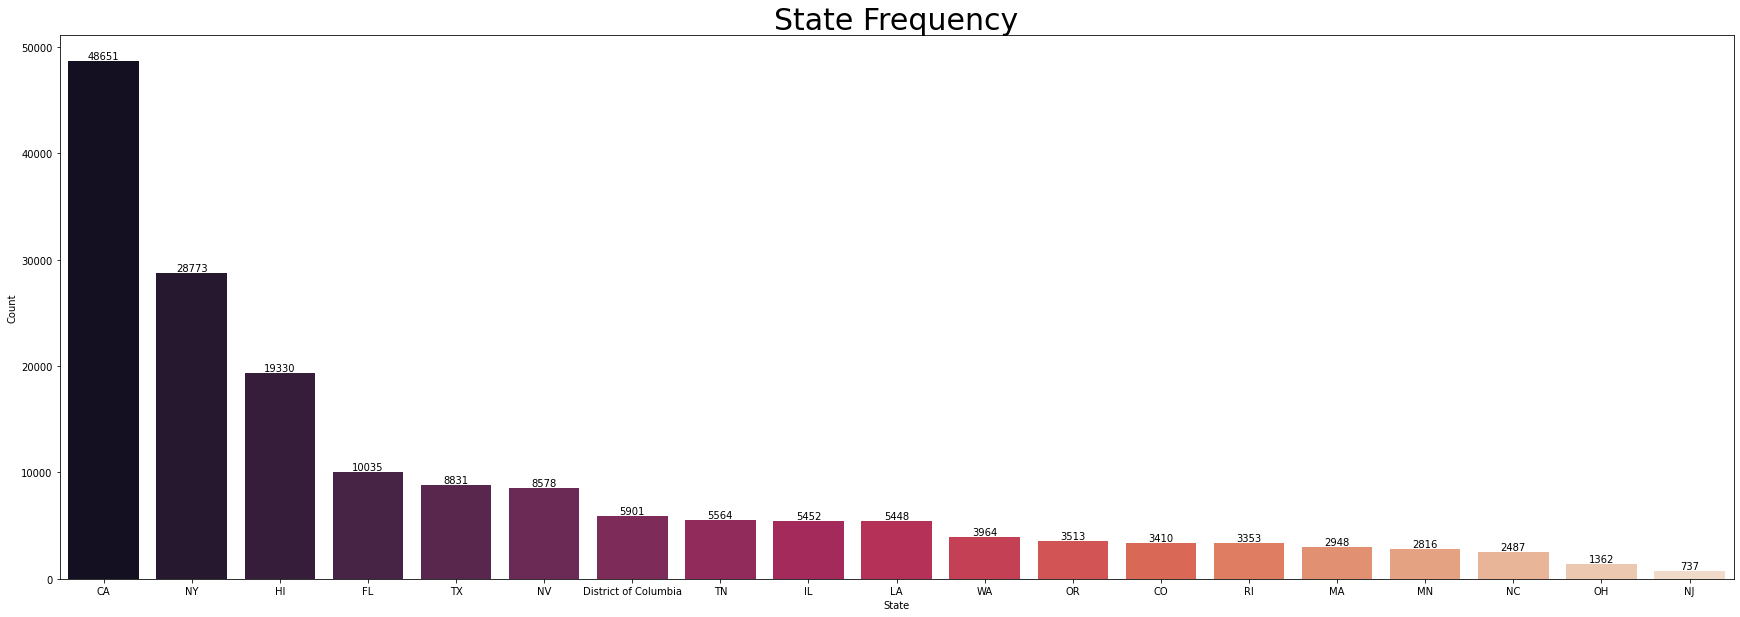

In [56]:
plt.figure(figsize=(30, 10))
State_Plot = sns.countplot(data=df, x="State", order=order3, palette="rocket")
State_Plot.set(xlabel = "State", ylabel="Count", title = "State Frequency")
State_Plot.set_title("State Frequency", fontsize = 30)
for i in State_Plot.containers:
    State_Plot.bar_label(i,)

In [72]:
city_list = ['Hawaii', 'Broward County', 'Santa Cruz County', 'Pacific Grove County']
df_subset = df[df["City"].isin(city_list)]
df_subset.columns

Index(['ID', 'Name', 'Host_ID', 'Host_Name', 'Neighborhood_Group',
       'Neighbourhood', 'Latitude', 'Longitude', 'Room_Type', 'Price',
       'Minimum_Nights', 'Number_of_Reviews', 'Last_Review',
       'Reviews_per_Month', 'Calculated_Host_Listings_Count',
       'Availability_365', 'Number_of_Reviews_LTM', 'Llicense', 'City',
       'State', 'MedianIncome', 'MedianAge'],
      dtype='object')

[(0.0, 50.0), (150.0, 575.0)]

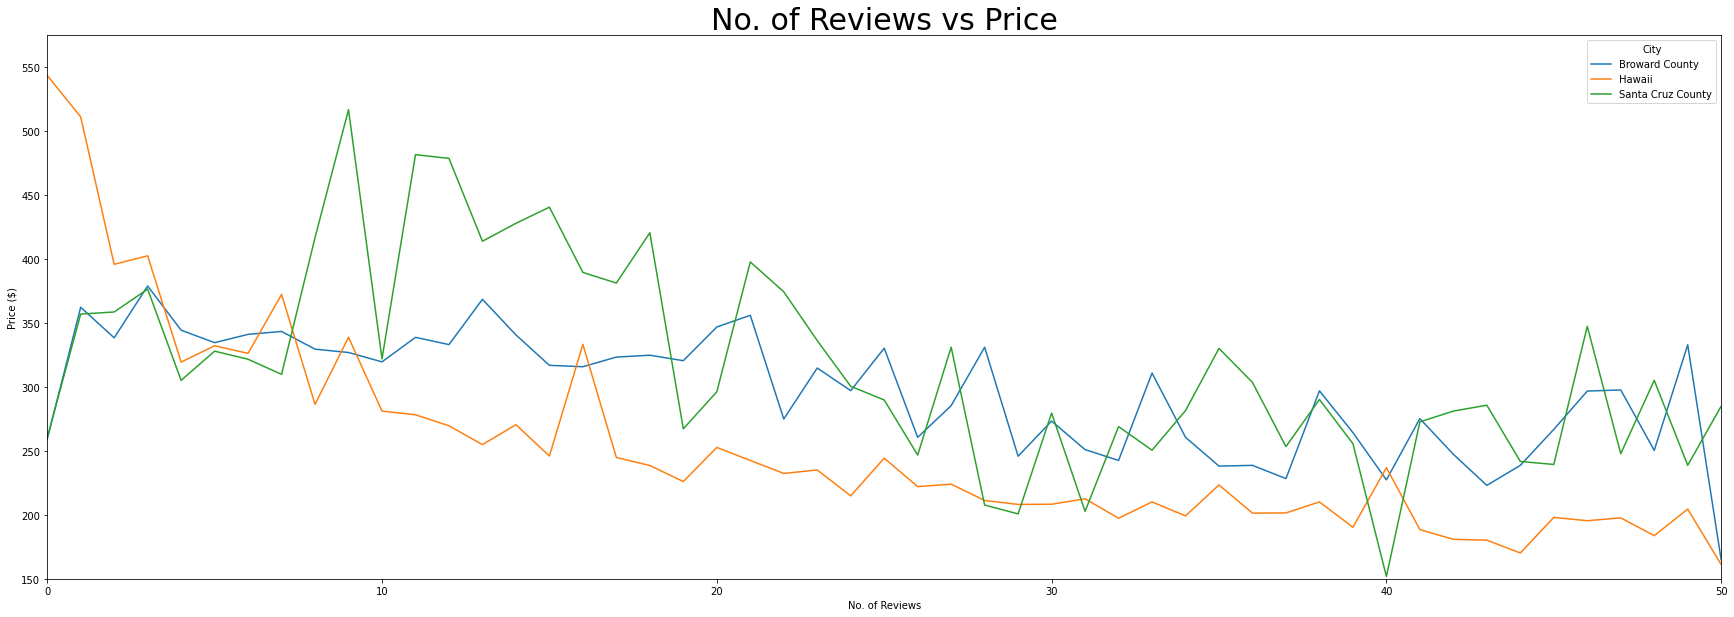

In [91]:
plt.figure(figsize=(30, 10))
Line_Plot = sns.lineplot(data=df_subset, x="Number_of_Reviews_LTM", y="Price", hue="City", ci=None)
Line_Plot.set(xlabel = "No. of Reviews", ylabel="Price ($)", title = "No. of Reviews from the Last 12 months vs Price")
Line_Plot.set_title("No. of Reviews vs Price", fontsize = 30)
Line_Plot.set(xlim=(0,50), ylim=(150, 575))

[(0.0, 100.0), (0.0, 1000.0)]

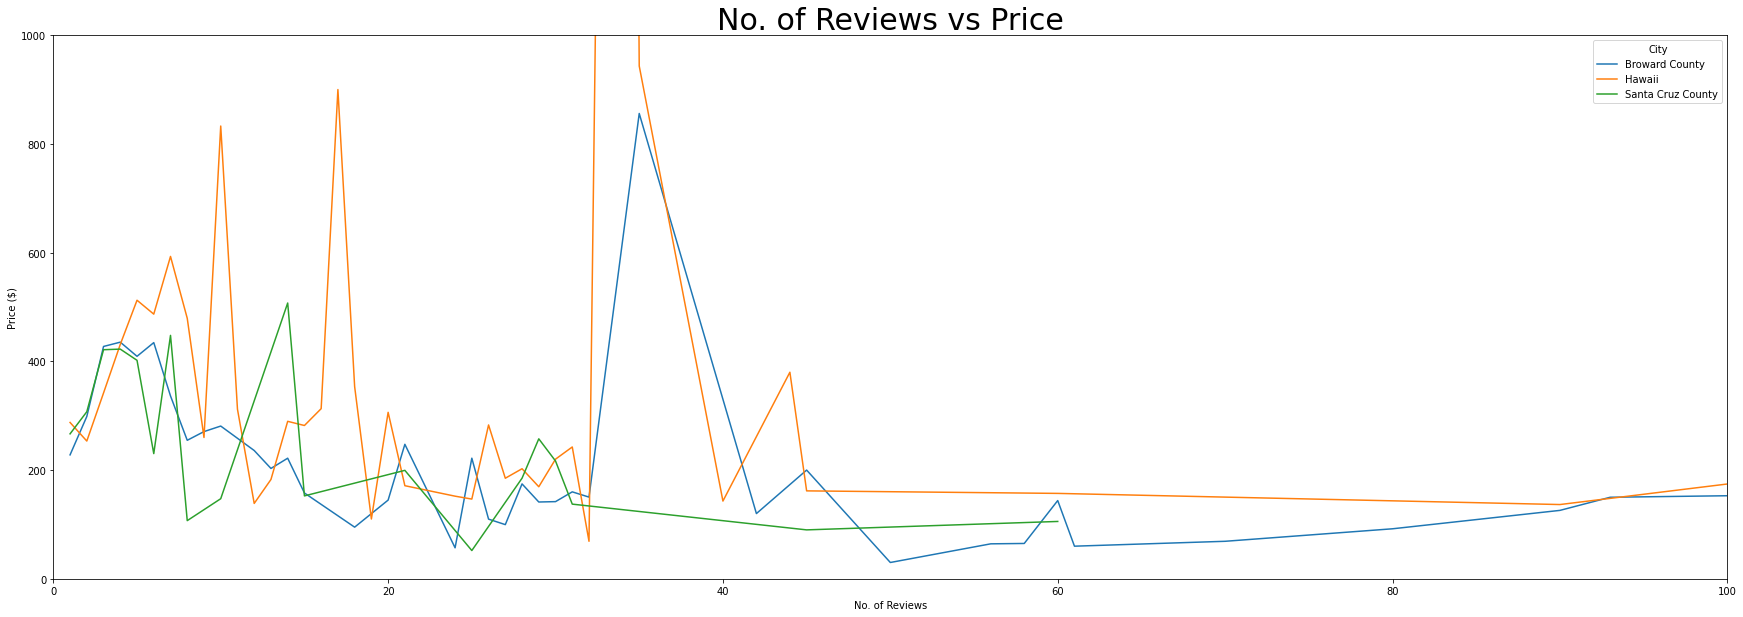

In [98]:
plt.figure(figsize=(30, 10))
Line_Plot = sns.lineplot(data=df_subset, x="Minimum_Nights", y="Price", hue="City", ci=None)
Line_Plot.set(xlabel = "No. of Reviews", ylabel="Price ($)", title = "No. of Minimum Nights")
Line_Plot.set_title("No. of Reviews vs Price", fontsize = 30)
Line_Plot.set(xlim=(0, 100), ylim=(0, 1000))

Text(0.5, 1.0, 'No. of Reviews vs Price')

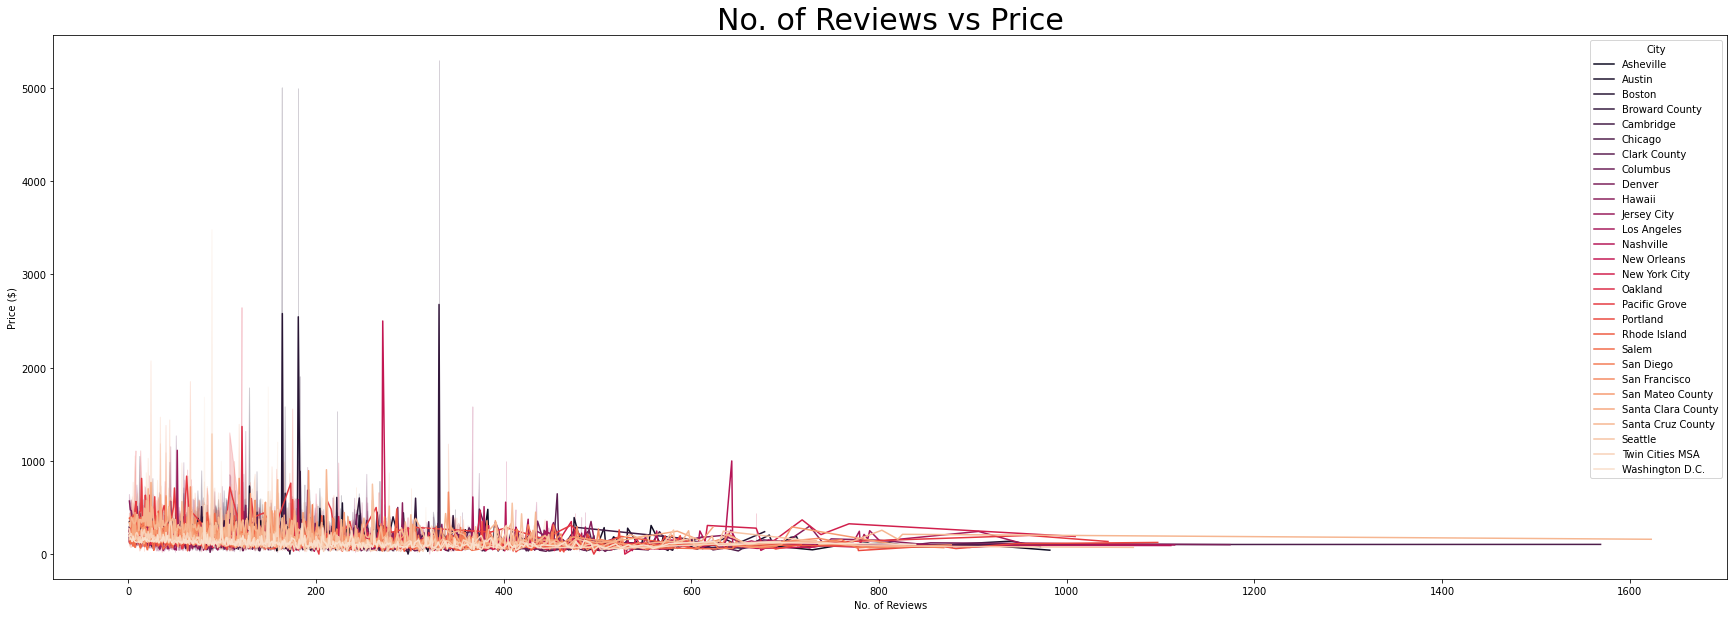

In [61]:
plt.figure(figsize=(30, 10))
Line_Plot = sns.lineplot(data=df, x="Number_of_Reviews", y="Price", hue="City", palette="rocket")
Line_Plot.set(xlabel = "No. of Reviews", ylabel="Price ($)", title = "No. of Reviews vs Price")
Line_Plot.set_title("No. of Reviews vs Price", fontsize = 30)

In [57]:
plt.figure(figsize=(30, 10))
State_Price_Plot = sns.barplot(data=df, x="State", y="Price", order=order4, ci=None, palette="rocket")
State_Price_Plot.set(xlabel = "State", ylabel="Price ($)", title = "Average Price by State")
State_Price_Plot.set_title("Average Price by State", fontsize = 30)
for i in State_Price_Plot.containers:
    State_Price_Plot.bar_label(i,)

NameError: name 'order4' is not defined

<Figure size 2160x720 with 0 Axes>